# Tarea 1

## Actividad 1

Establecer un modelo de crecimiento poblacional basado en el Modelo Logístico utilizando los datos de 3 distintos años de la tabla.

Se parte de la ecuación diferencial logística la cual modela la tasa de cambio marginal de una población en función de los cambios en el tiempo t

### Ecuación diferencial logistica. 
### Solución Analítica

Para obtener una mejor comprensión sobre el crecimiento de la población podemos resolver el problema del valor inicial:

$$
P'(t) = kP(t)\left(1 - \frac{P(t)}{K}\right),
\quad P(0) = P_0,
$$

analíticamente. Dado que

$$
\frac{dP}{dt} = kP\left(1 - \frac{P}{K}\right),
$$

tenemos

$$
\frac{dP}{P\left(1 - \frac{P}{K}\right)} = k \, dt,
$$

y al integrar obtenemos

$$
\ln\left(\frac{P}{K - P}\right) = kt + c,
$$

donde \(c\) es una constante que debemos determinar usando la condición inicial. Para \(t = 0\),

$$
\ln\left(\frac{P_0}{K - P_0}\right) = c,
$$

y por lo tanto

$$
\ln\left(\frac{\frac{P}{K - P}}{\frac{P_0}{K - P_0}}\right) = kt,
$$

o

$$
\frac{P}{K - P} = \frac{P_0}{K - P_0}e^{kt}.
$$

Al resolver esta ecuación con respecto a \(P\), obtenemos

$$
P(t) = \frac{P_0}{P_0 + e^{-kt}(K - P_0)}K.
$$

Al multipicar el numerador y el denominadr por 1/P0

$$
P(t) = \frac{K}{1 + \frac{(K - P_0)}{P_0}e^{-kt}}.
$$

Sustituyendo (K-P0)/P0 por C

$$
P(t) = \frac{K}{1 + Ce^{-kt}}.
$$

Donde:
* P(t) = Es la cantidad de población en el momento t
* K = Barrera poblacional o capacidad de carga. Es el valor al que convergerá la población ya que los medios y recursos con los que se cuentan no permiten que exista una población por encima de esta cantidad.
* k = Es la tasa intrínseca de crecimeinto de la población. Representa la tasa a la que crecerá una población cuando es suficientemente pequeña como para que la cantidad de recursos no represente una limitante.
* t = Es el periodo de tiempo en el que se encuentra la población
* C = Es una constante arbitraria que depende de algunos valores iniciales.

A partir de esta última ecuación es que se puede ajustar el modelo de crecimiento poblacional. Para esto es necesario encontrar los valores adecuados de K, k, C

Solución tomada de Elements of Scientific Computing (Tveito, Langtangen, Nielsen y Cai, 2010, p.39)

### Se importan las librerías con las que se trabajará

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Para estalecer el modelo se seleccionan tres años de la tabla de datos.

La tabla en cuestión se presenta en el siguiente dataframe, en la cual se colocan en los nombres de las columnas los valores del parámetro t 

In [2]:
tabla_datos = pd.DataFrame({"t": [0, 10, 20, 30, 40, 50, 60, 65],
              "año": [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2015],
              "poblacion": [25.8, 34.9, 48.2, 66.8, 81.2, 97.5, 112.3, 119.5]
              })
tabla_datos = tabla_datos.T
nombres_columnas = {
    0:"t0",
    1:"t10",
    2:"t20",
    3:"t30",
    4:"t40",
    5:"t50",
    6:"t60",
    7:"t65"
    }
tabla_datos = tabla_datos.rename(
    columns=nombres_columnas)
tabla_datos

,t0,t10,t20,t30,t40,t50,t60,t65
t,0.0,10.0,20.0,30.0,40.0,50.0,60.0,65.0
año,1950.0,1960.0,1970.0,1980.0,1990.0,2000.0,2010.0,2015.0
poblacion,25.8,34.9,48.2,66.8,81.2,97.5,112.3,119.5


### Se crea la función de la ecuación general 

Esta es la función que se usará para estimar los valores de los parámetros

In [3]:
def ecuacion_general(t, K, k, C):
    return K/(1 + (C)*np.exp((-k)*t))

Se crean dos listas, que contendrán cada uno los tres años y los tres valores correspondientes de población mediante los cuales se hará el ajuste del modelo para estimar los mejores valores de K, k, C

En este caso los años se pasarán de manera relativa a la primera observación con la que se cuenta. Es decir, el año 1950 = 0, 1960=10, 1970=20, etc.

La población se presenta en millones de personas.

Los valores que se elegirán corresponden al primer año observado, un año intermedio y el último año observado, de manera que estos sean representativos de la tendencia del crecimiento poblacional a lo largo de todo el periodo de estudio.

In [4]:
años_ajuste = tabla_datos.loc["t", ["t0", "t30", "t65"]]
años_ajuste = años_ajuste.to_list()

poblacion_ajuste = tabla_datos.loc["poblacion", ["t0", "t30", "t65"]]
poblacion_ajuste = poblacion_ajuste.to_list()

print(f"Los años elegidos son: {años_ajuste}")
print(f"Los valores de la población para estos años son: {poblacion_ajuste}")

Los años elegidos son: [0.0, 30.0, 65.0]
Los valores de la población para estos años son: [25.8, 66.8, 119.5]


Se usa la función **curve_fit** de la librería scipy.optimize, para ajustar el modelo. Esta función tomar los siguientes argumentos 
* La función general, 
* Los datos de la variable independiente (t), 
* Los datos de la variable dependiente (P)
* Una lista con los valores iniciales de los parámetros que estimará, en este caso K, k, C. Estos valores iniciales sirven para que el algoritmo tenga un punto de partida desde el cual busque converger a la solución óptima. En este caso, el valor inicial de la capacidad de carga se establecerá como el valor máximo observado en los datos de la población, ya que es lógico pensar que el valor de carga estará relativamente cerca de este valor. Los valores iniciales de k y C, se establecieron con base en valores recomendados para este tipo de modelos.

Como resultado esta función regresa una lista con los valores de los parámetros que, con base en la ecuación de la solución general, mejor se ajustan a los valores observados. Esto lo hace mediante el método de mínimos cuadrados no lineales.

In [5]:
# Estimación de los valores óptimos de K, k, C
params, covariance = curve_fit(ecuacion_general, años_ajuste, poblacion_ajuste, p0=[max(poblacion_ajuste), 0.1, 1])

K, k, C = params

/var/folders/0b/hts5srpx5_l1nx4dpnvvbb0w0000gn/T/ipykernel_9022/3235548610.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(ecuacion_general, años_ajuste, poblacion_ajuste, p0=[max(poblacion_ajuste), 0.1, 1])


In [6]:
print("Los valores óptimos que estima el algoritmo para los parámetros del modelo son:")

parametros_estimados = pd.DataFrame({"Parámetros": [K, k, C]}, 
             index=["K", "k", "C"])

parametros_estimados.round(3)

Los valores óptimos que estima el algoritmo para los parámetros del modelo son:


,Parámetros
K,150.491
k,0.045
C,4.833


De acuerdo con los datos con los que fue alimentado el modelo, para el caso de México, entre los años 1950 y 2015, se estima que la capacidad de carga, es de aproximadamente 150.5 millones de personas, es decir, que entre más se acerque la población mexicana a esta cantidad, el crecimiento marginal de la población en el tiempo se irá acercando a cero, de manera que el número de personas en la población mexicana, no superará los 150.5 millones.

El valor de k representa el valor de la tasa intrínseca de crecimiento de la población. En este caso signifca que el crecimeinto natural de la población, lo que implica que en condiciones ideales, la población crecerá una cantidad de k=0.045 por cada pediodo t

Por último el valor de C=4.83 millones implica un ajuste o "escalado" que se hace de la solución general para que esta represente de mejor manera las condiciones iniciales de las que parte la población.

## Actividad 2 y 3

Crear una tabla para comparar la población real con los valores pronosticados

Calcular el porcentaje de error para cada par de datos

In [7]:
pronostico_poblacion = [ecuacion_general(t, K, k, C).round(1) for t in tabla_datos.loc["t", :]]
poblacion_real = tabla_datos.loc["poblacion", :]
poblacion_real = poblacion_real.to_list()

tabla_comparativa = pd.DataFrame({
    "Poblacion Real": poblacion_real,
    "Poblacion Pronosticada": pronostico_poblacion},
    index=(tabla_datos.loc["año", :]))

tabla_comparativa["Porcentaje de error"] = \
((tabla_comparativa["Poblacion Pronosticada"] / \
tabla_comparativa["Poblacion Real"] - 1)*100).round(2)

tabla_comparativa

,Poblacion Real,Poblacion Pronosticada,Porcentaje de error
año,,,
1950.0,25.8,25.8,0.00
1960.0,34.9,36.9,5.73
1970.0,48.2,50.8,5.39
1980.0,66.8,66.8,0.00
1990.0,81.2,83.7,3.08
2000.0,97.5,99.7,2.26
2010.0,112.3,113.6,1.16
2015.0,119.5,119.5,0.00


In [8]:
porcentaje_error_medio = tabla_comparativa.loc[:, "Porcentaje de error"].mean()
print(f"El porcentaje de error promedio es de: {porcentaje_error_medio.round(1)}%")

El porcentaje de error promedio es de: 2.2%


Los valores pronosticados por el modelo, no se alejan mucho de los valores observados, la mayor diferencia es de 2.6 millones para el año 1970 (Sin tomar en cuenta los valores que se usaron para generar el modelo)

El porcentaje de error promedio es de 2.2%, lo cual indica una buena capacidad de pronóstico por parte del modelo.

## Actividad 4

Dar una conclusión acerca del modelo propuesto y su efectividad

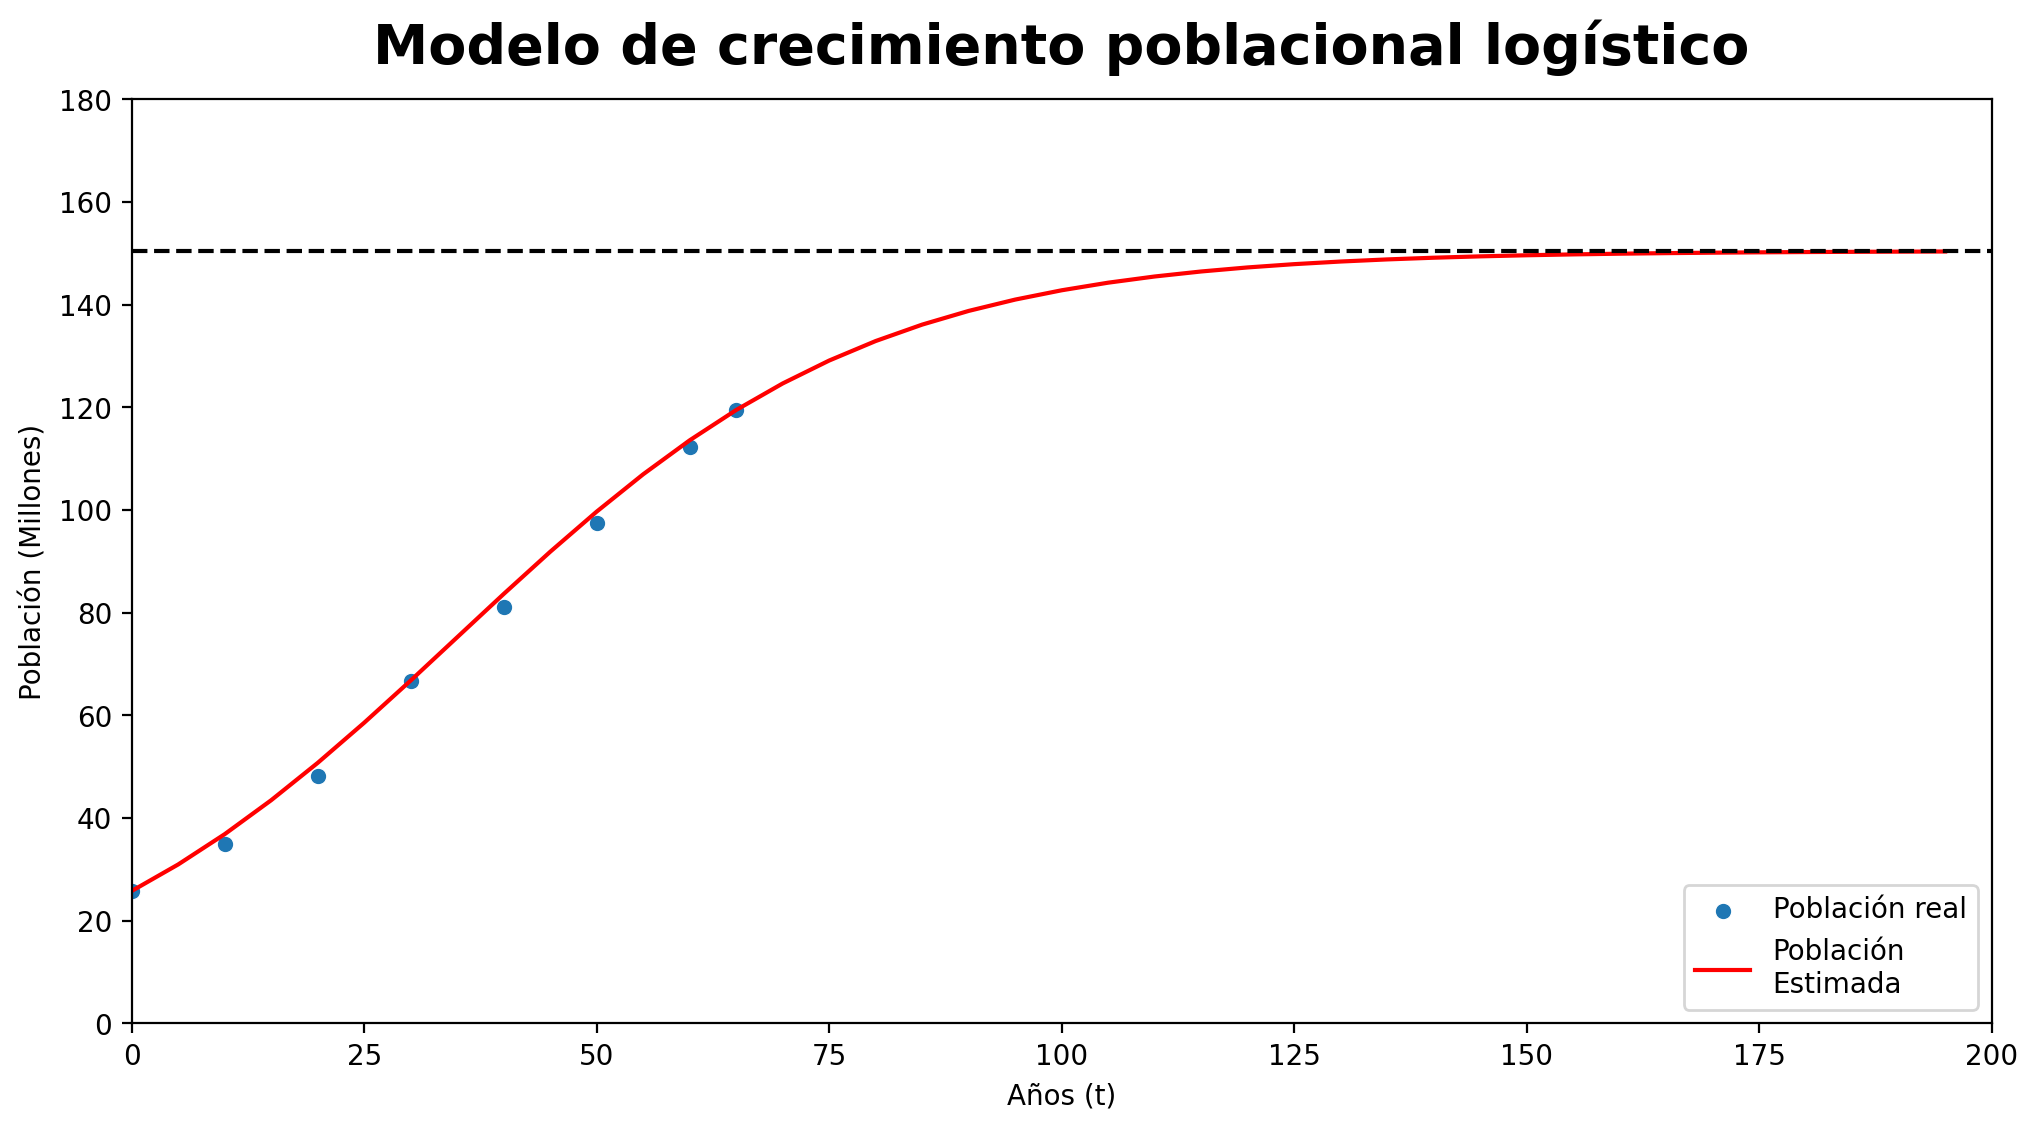

In [9]:
# Creo un array de valores simulados de t, que vayan desde el año cero
# hasta el año 200, esto con el fin de ver los valores predichos por
# el modelo en el largo plazo
t_simulada = np.arange(start=0, stop=200, step=5)

# Se generan listas con todos los datos observados tanto de los valores 
# de t, así como los valores asociados de la población.
total_años_observados = tabla_datos.loc["t", :]
total_años_observados = total_años_observados.to_list()

total_poblacion_observada = tabla_datos.loc["poblacion", :]
total_poblacion_observada = total_poblacion_observada.to_list()

# Se usa la función de la solución general evaluada con los valores estimados de
# K, k, C, para generar valores de la población pronosticados respecto a distintos 
# valores de t. 
poblacion_pronosticada = [ecuacion_general(t, K, k, C) for t in t_simulada]

plt.figure(figsize=(12, 6), dpi=200)
sns.scatterplot(x=total_años_observados, y=total_poblacion_observada, label="Población real")
sns.lineplot(x=t_simulada, y=poblacion_pronosticada, color="red", label="Población\nEstimada")
plt.xlabel("Años (t)")
plt.ylabel("Población (Millones)")
plt.title("Modelo de crecimiento poblacional logístico", 
          y=1.02,
          fontdict={"fontweight": "bold",
                    "fontsize": 20})
plt.ylim(0, 180)
plt.xlim(0, 200)
plt.hlines(y=K, 
           xmin=0, 
           xmax=200,
           color="black",
           linestyles="--")
plt.legend(loc="lower right")
plt.show()

El modelo logistico que se usó para ajustar en modelo de crecimiento poblacional es un modelo que tiene en cuenta factores como la limitación de recursos que se tienen en el etorno a la hora de calcular la tasa de crecimiento de la población. Esto significa que cuando la población es pequeña, los recursos no representan una limitante y por lo tanto el crecimiento es más grande entre cada periodo t, sin embargo, cuando la población llega a un grado en el que los pobladores necesitan competir por los recursos escazos, entonces la tasa de crecimiento de la población decrece. 

En la gráfica se puede ver que la tasa de cambio marginal de la población respecto del tiempo se va acercando a cero cuando la población se acerca a los 150.5 millones ya que esta es la barrera poblacional o capacidad de carga poblacional que establece el modelo.

El análisis de los pronósticos de la población hechos a partir de este modelo, y los porcentajes de error obtenidos muesrtran que este tiene una buena capacidad de predecir el comportamiento de la población mexicana en el tiempo.

En la gráfica de arriba, se puede observar de una manera más clara cuán cercana es la curva de valores pronosticados por el modelo, respecto de los valores reales observados.

Como es lógico, la curva del modelo pasa justo en medio de los tres puntos que se utilizaron para ajustarla, pero también pasa muy cerca del resto de valores observados, lo que muestra que el modelo ha sido capaz de pronosticar de manera bastante exacta la tendencia de la población en los distintos valores de t.

## Herramientas utilizadas
* Python
* ChatGPT (Para la escritura de código LaTeX)

El código puede consultarse en el siguiente repositorio:

https://github.com/MarioRoFe/Tarea_1_Matematicas